# A day in the life of the SGP

In [22]:
import xarray
import numpy as np
from matplotlib import pyplot as plt
import netCDF4

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from metpy.calc import get_wind_components, lcl, dry_lapse, parcel_profile
from metpy.plots import SkewT, Hodograph
from metpy.units import units, concatenate

%matplotlib inline

In [4]:
#Sounding data 
sounding = netCDF4.Dataset('../data/sgpsondewnpnC1.b1.20180609.053700.cdf')

In [7]:
#Lets see what is in the data
print(sounding.variables.keys())

odict_keys(['base_time', 'time_offset', 'time', 'qc_time', 'pres', 'qc_pres', 'tdry', 'qc_tdry', 'dp', 'qc_dp', 'wspd', 'qc_wspd', 'deg', 'qc_deg', 'rh', 'qc_rh', 'u_wind', 'qc_u_wind', 'v_wind', 'qc_v_wind', 'wstat', 'asc', 'qc_asc', 'lat', 'lon', 'alt'])


In [15]:
T = sounding.variables['tdry'][:]
Td = sounding.variables['dp'][:]
p = sounding.variables['pres'][:]
height = sounding.variables['alt'][:]

u = sounding.variables['u_wind'][:]
v = sounding.variables['v_wind'][:]

p = p * units.mbar
T = T * units.degC
Td = Td * units.degC
u = u * units.m/units.s
v = v * units.m/units.s


<Figure size 1080x1080 with 0 Axes>

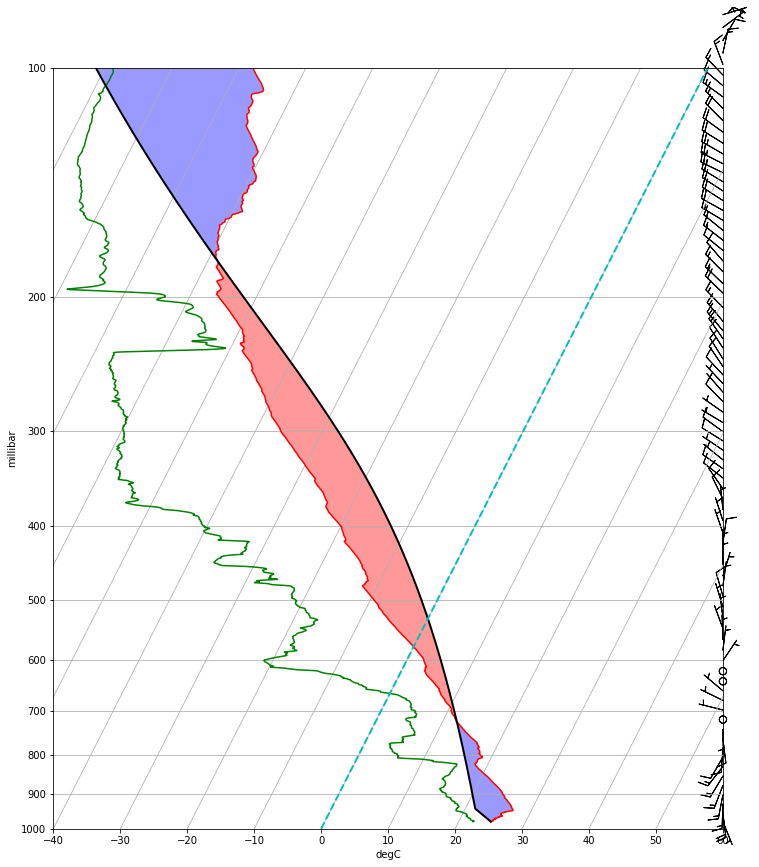

In [34]:
old_params = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (12, 14)
#Create a skewT plot
ff = plt.figure(figsize=[15,15])

skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::40], u[::40], v[::40])
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)


# Calculate full parcel profile and add to plot as black line
prof = parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Example of coloring area between profiles
skew.ax.fill_betweenx(p, T, prof, where=T>=prof, facecolor='blue', alpha=0.4)
skew.ax.fill_betweenx(p, T, prof, where=T<prof, facecolor='red', alpha=0.4)

# An example of a slanted line at constant T -- in this case the 0 isotherm
l = skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)


plt.rcParams['figure.figsize'] = old_params


In [19]:
p[0]

<Quantity(978.5700073242188, 'millibar')>